# TMNIST Alphabets Classification Using Convolutional Neural Network

## Author: 
- Yash Pankhania (pankhania.y@northeastern.edu)

Github Repository URL: https://github.com/Draconian10/TMNIST_Alphabets_Classification_Using_CNN

## Abstract
This notebook presents a Convolutional Neural Network (CNN) based approach for performing typography classification on the MNIST dataset consisting of 94 alphabets. The dataset contains 94 classes of alphabets with variations in size, thickness, and orientation. The proposed approach utilizes a deep CNN architecture with multiple convolutional and pooling layers, followed by fully connected layers for classification. The model achieved a high accuracy of around 94% on the test set. The results demonstrate the effectiveness of CNNs in handling complex typography datasets and provide a promising solution for various real-world applications, such as automated character recognition systems.

Data Set: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

In [1]:
import numpy as np 
import pandas as pd 
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing libraries for building CNN
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

## TensorFlow
- TensorFlow is an open-source machine learning framework that was developed by Google Brain team. 
- It allows developers to build and train machine learning models for a variety of tasks, such as image recognition, natural language processing, and many more. 
- TensorFlow provides a flexible architecture that enables users to deploy computations across multiple CPUs or GPUs in a desktop, server, or mobile device environment.
- One of the key features of TensorFlow is its ability to define, optimize, and efficiently calculate mathematical expressions involving multi-dimensional arrays, or tensors. 
- TensorFlow uses a dataflow graph to represent the computation in a machine learning model, which makes it easier to parallelize the calculations and optimize performance. 

Refer: https://www.tensorflow.org/api_docs/python/tf

In [2]:
from google.colab import drive
# Mounting Google Drive to Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset
df = pd.read_csv('drive/My Drive/Colab Notebooks/94_character_TMNIST.csv')

In [4]:
# Displaying the data set
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Obtaining information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


In [6]:
# Obtaining total number of rows and columns in the dataset
df.shape

(274093, 786)

In [7]:
# Fetching number of unique labels in the dataset
df['labels'].nunique()

94

In [8]:
# Selecting the list of unique labels in the dataset
df['labels'].unique()

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

In [9]:
# Grouping All labels
labels = list(df['labels'].unique())
labels.sort()
print(labels)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [10]:
# Grouping all labels into four different categories
upper_case_pattern = re.compile(r"[A-Z]")
lower_case_pattern = re.compile(r"[a-z]")
number_pattern = re.compile(r"[0-9]")
symbol_pattern = re.compile(r"[\W]|[\_\,]")

In [11]:
# Extracting Patterns from the labels
upper = upper_case_pattern.findall(str(labels))
upper.sort()
print('Upper Case Labels: ', upper)

lower = lower_case_pattern.findall(str(labels))
lower.sort()
print('Lower Case Labels: ', lower)

num = number_pattern.findall(str(labels))
num.sort()
print('Numeric Labels: ', num)

symbols = list(set(symbol_pattern.findall(str(labels))))
print('Symbolic Labels: ', symbols)

Upper Case Labels:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Lower Case Labels:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Numeric Labels:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Symbolic Labels:  ['#', '(', '=', '{', '?', '^', ')', '&', ';', '>', '}', '|', '*', ' ', '-', ',', '.', '/', ':', '@', '<', '%', '[', '_', ']', '`', '~', "'", '"', '!', '+', '$', '\\']


In [12]:
# Creating Groups
group = 1
for i in (lower,upper,num,symbols):
    df.loc[df['labels'].isin(i), 'group'] = str(group)
    group += 1

## Test Train Split

- Test train split is a common technique used in machine learning to evaluate the performance of a predictive model. 
- The idea is to split the available dataset into two subsets: a training set and a testing set. 
- The training set is used to train the model, while the testing set is used to evaluate the model's performance.
- The split is usually done randomly, with a certain percentage of the data set aside for testing, and the remainder used for training. 
- The typical split is to use around 70-80% of the data for training and the remaining 20-30% for testing.

In [13]:
# Splitting the main DataFrame into X and y
X = df.iloc[:, 2:-1].astype('float32')
y  = df[['labels']]

In [14]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y

,labels
0,6
1,D
2,f
3,/
4,F
...,...
274088,6
274089,<
274090,z
274091,~


In [16]:
# Creating a data dictionary of the alphabets 
data_labels = y['labels'].unique()
index = [num for num in range(len(df['labels'].unique()))]
dictionary = dict(zip(data_labels,index))
data_dict = dict(zip(index,data_labels))

In [17]:
print(data_dict)

{0: '6', 1: 'D', 2: 'f', 3: '/', 4: 'F', 5: 'x', 6: 'J', 7: '8', 8: 'H', 9: 'k', 10: '@', 11: '1', 12: '=', 13: 'g', 14: ')', 15: '2', 16: 'd', 17: '^', 18: '3', 19: 't', 20: '#', 21: '.', 22: '4', 23: 'o', 24: '"', 25: 'y', 26: 'A', 27: 'u', 28: 'G', 29: '-', 30: 'm', 31: 'W', 32: '&', 33: 'c', 34: '9', 35: 'N', 36: ']', 37: 'P', 38: 'X', 39: '|', 40: '}', 41: 'h', 42: '7', 43: 'j', 44: '5', 45: '>', 46: '?', 47: 'b', 48: '*', 49: 'w', 50: 'l', 51: '0', 52: '$', 53: 'I', 54: 'Y', 55: '%', 56: ':', 57: 'T', 58: 'K', 59: 'E', 60: '<', 61: 'V', 62: '{', 63: 'M', 64: 'S', 65: 'a', 66: 'i', 67: 'r', 68: "'", 69: 'p', 70: ';', 71: '[', 72: '+', 73: 'e', 74: 'U', 75: '(', 76: 's', 77: '~', 78: ',', 79: 'C', 80: 'q', 81: '_', 82: 'n', 83: 'B', 84: 'z', 85: 'v', 86: 'O', 87: 'R', 88: '`', 89: 'Z', 90: 'Q', 91: 'L', 92: '!', 93: '\\'}


In [18]:
# Mapping the dataset
y['labels'].replace(dictionary, inplace = True)

In [19]:
print(y)

        labels
0            0
1            1
2            2
3            3
4            4
...        ...
274088       0
274089      60
274090      84
274091      77
274092      53

[274093 rows x 1 columns]


In [20]:
# Splitting the Data set into 80% Training set and 20% Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# Prepping the inputs for Training
l, h = 28,28
unique = y_train.nunique()[0]

# Reshape the input data to be the size of 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,l, h)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,l, h))

# Convert the Target variables into Categorical Values
y_train = to_categorical(y_train, unique, dtype='int' )
y_test = to_categorical(y_test, unique, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


## Data Visualization

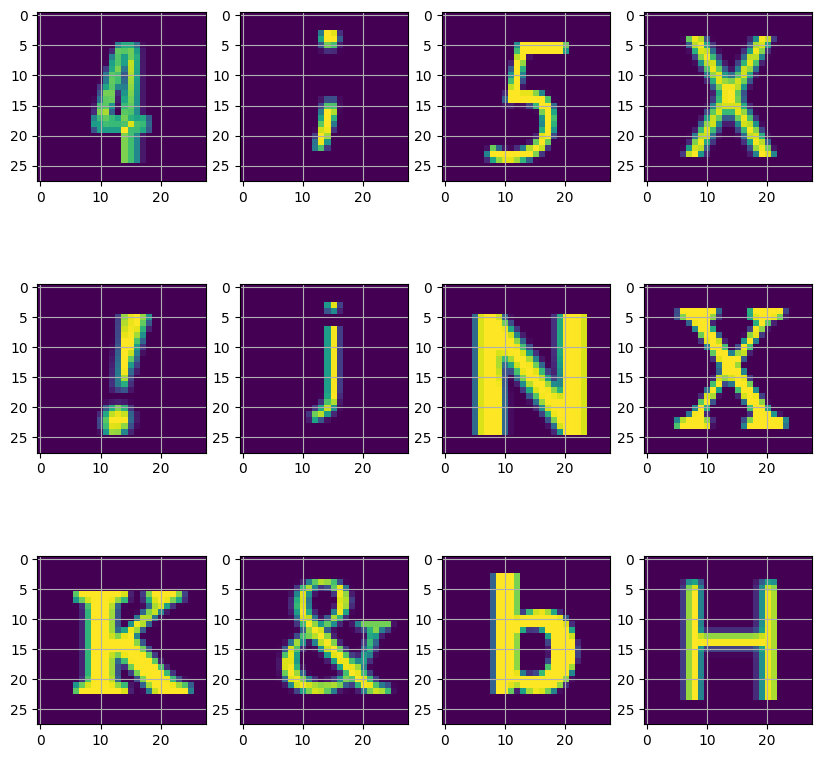

In [22]:
# Displaying the character images of our dataset
rand = shuffle(X_train[:500])
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(rand[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img)
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

In [23]:
# Adding a fourth dimension to the input data to represent the number of color channels
RGB = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

# Normalizing the image data
X_train = X_train/255
X_test = X_test/255

# Printing the shape of normalized data
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


## Convolutional Neural Network
A convolutional neural network (CNN) is a type of artificial neural network that is commonly used in image recognition and computer vision tasks. It is designed to process data with a grid-like topology, such as images, by applying filters or kernels to the input data in order to extract relevant features.

CNNs are inspired by the structure of the visual cortex in the brain, where different neurons respond to different parts of the visual field. Similarly, in a CNN, different filters or kernels are used to detect different features of an image, such as edges, shapes, and patterns.


<img src = "https://editor.analyticsvidhya.com/uploads/183560_qcMBDPuKpDvICcdd.png">

A typical convolutional neural network (CNN) consists of several layers that are designed to extract features from input data, such as images. CNN consists of the following components:


### 1. Input Layer 

The input layer is the first layer of the network and is responsible for receiving the input data, such as an image.

### 2. Convolutional Layer
The convolutional layer is responsible for applying filters or kernels to the input data in order to extract features. Each filter detects a specific pattern or feature in the input data, such as edges, corners, or other shapes.

### 3. ReLU Layer 
The ReLU (Rectified Linear Unit) layer applies a non-linear activation function to the output of the convolutional layer. The ReLU function sets all negative values to zero, which helps to introduce non-linearity into the network and improve its ability to learn complex patterns.

### 4. Pooling Layer 
The pooling layer is used to downsample the output of the convolutional layer, reducing the spatial resolution and making the network more computationally efficient. Common types of pooling layers include max pooling, which takes the maximum value within a specified window, and average pooling, which takes the average value.

### 5. Dropout Layer 

The dropout layer is used to prevent overfitting by randomly dropping out some of the neurons in the network during training.

### 6. Fully Connected Layer 
The fully connected layer is responsible for making the actual predictions based on the extracted features. It takes the output of the previous layers and applies a set of weights to produce a set of scores or probabilities.

### 7. Output Layer 
The output layer produces the final output of the network, which can be a classification or regression output depending on the task.

Refer: https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/

In [24]:
model = Sequential()

# Adding a 2D convolutional layer to the model with 32 filters and a kernel size of 3x3
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (l, h, RGB), padding = 'same',))

# Adding a batch normalization layer to the model to improve the training of the neural network by normalizing the inputs
model.add(BatchNormalization())

# Adding a ReLU activation function to the model to introduce non-linearity into the neural network
model.add(tf.keras.layers.Activation('relu'))

# Adding a max pooling layer to the model to reduce the spatial dimensions of the input image by taking the maximum value within a specified pool size
model.add(MaxPool2D(pool_size = (2,2)))

# Adding a dropout layer to the model to randomly set 25% of the input units to 0 at each update during training time to prevent overfitting.
model.add(Dropout(0.25))

In [25]:
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

These lines add additional convolutional, batch normalization, activation, max pooling, and dropout layers to the model with similar settings to the previous layers, but with increased filter size (64).

In [26]:
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

These lines add more convolutional, batch normalization, activation, max pooling, and dropout layers to the model with increased filter size again (128).

In [27]:
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

These lines add even more convolutional, batch normalization, activation, max pooling, and dropout layers to the model with increased filter size yet again (256).

In [28]:
# Flattening the output from the convolutional layers into a one-dimensional array to input into a fully connected layer
model.add(Flatten())

In [29]:
# Adding a fully connected layer with 350 neurons, followed by batch normalization, activation, and dropout layers.
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))

In [30]:
# Adding the output layer to the model, which is a fully connected neural network layer with the softmax activation function
model.add(Dense(unique, activation = 'softmax'))

In [31]:
# Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [32]:
# Defining parameters for Training the model
optimizer  = Adam(learning_rate=0.01)
callback = EarlyStopping(monitor='loss', patience=5)
Batch = 64
Epochs = 100

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [33]:
# Training the model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = Batch, epochs = Epochs, verbose = 1)

Epoch 1/100
3427/3427 [==============================] - 45s 9ms/step - loss: 0.6196 - accuracy: 0.8169 - val_loss: 0.3419 - val_accuracy: 0.8910
Epoch 2/100
3427/3427 [==============================] - 28s 8ms/step - loss: 0.3987 - accuracy: 0.8771 - val_loss: 0.2542 - val_accuracy: 0.9188
Epoch 3/100
3427/3427 [==============================] - 28s 8ms/step - loss: 0.3599 - accuracy: 0.8895 - val_loss: 0.2540 - val_accuracy: 0.9157
Epoch 4/100
3427/3427 [==============================] - 29s 8ms/step - loss: 0.3374 - accuracy: 0.8961 - val_loss: 0.2404 - val_accuracy: 0.9189
Epoch 5/100
3427/3427 [==============================] - 28s 8ms/step - loss: 0.3199 - accuracy: 0.9011 - val_loss: 0.2293 - val_accuracy: 0.9269
Epoch 6/100
3427/3427 [==============================] - 28s 8ms/step - loss: 0.3107 - accuracy: 0.9024 - val_loss: 0.2222 - val_accuracy: 0.9286
Epoch 7/100
3427/3427 [==============================] - 28s 8ms/step - loss: 0.3027 - accuracy: 0.9056 - val_loss: 0.2149 -

In [34]:
# Evaluating model accuracy on test data
score = model.evaluate(X_test, y_test, batch_size = Batch, verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:94.5%


In [35]:
# Defining a function to plot the accuracy and loss curves during training
def accuracy_plot (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # Summarizing history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('CNN Model Accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # Summarizing history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('CNN Model Loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

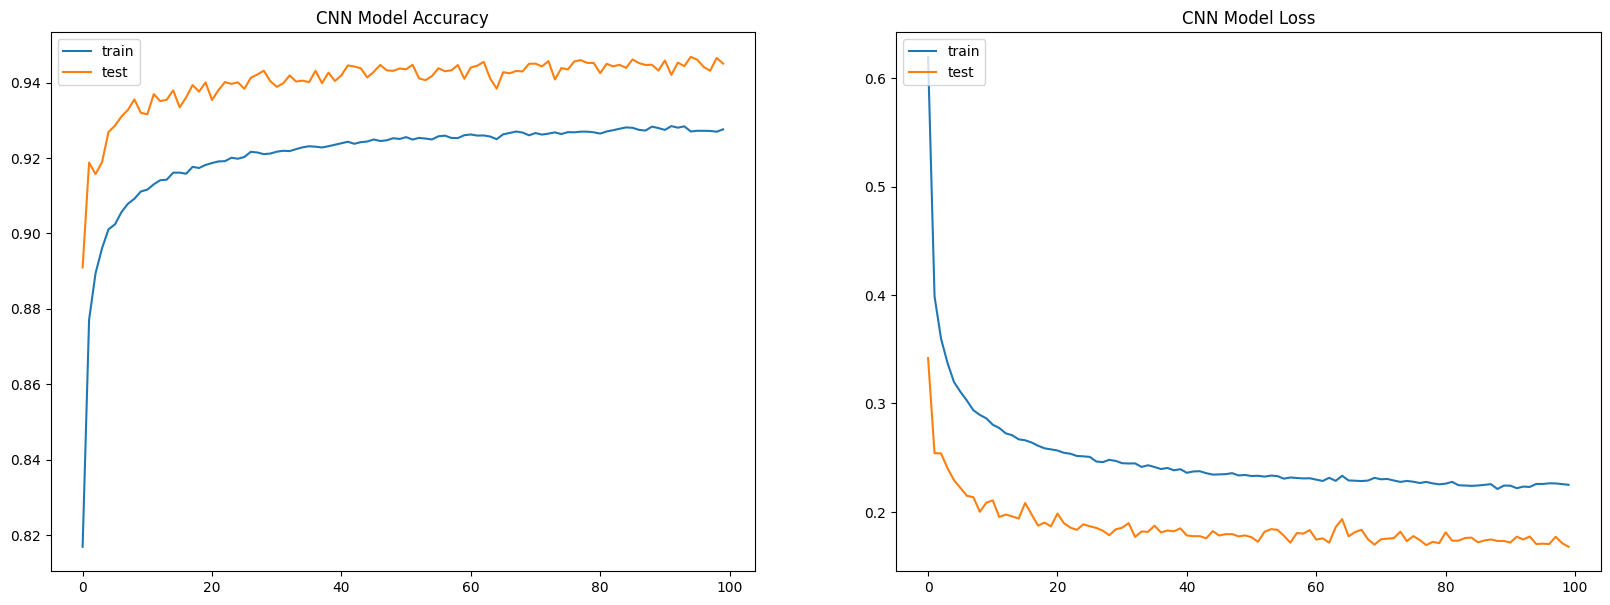

In [36]:
# Plotting the accuracy and loss curves during training
accuracy_plot(history)

1/1 [==============================] - 0s 26ms/step


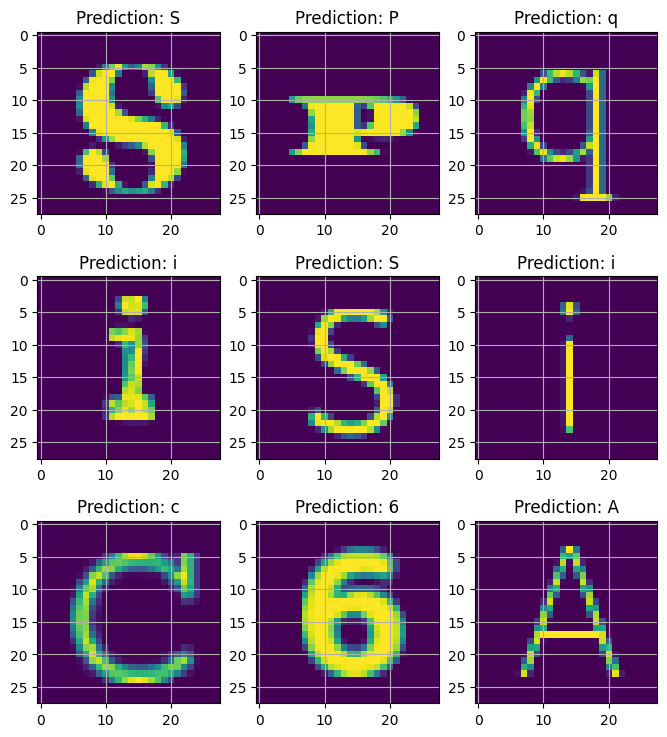

In [37]:
# Predicting the characters using the trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    # Reshaping the characters for display
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img)
    # Reshaping the characters to pass into the model for prediction
    test_image = np.reshape(img, (1,28,28,1))
    y_pred = data_dict[np.argmax(model.predict(test_image))]
    ax.set_title("Prediction: " + y_pred)
    ax.grid()

## Conclusion
In conclusion, this study showcases the potential of Convolutional Neural Network (CNN) based approaches for automated character recognition systems, particularly for typography classification on the challenging MNIST dataset consisting of 94 alphabets. The proposed model utilizes a deep CNN architecture with multiple convolutional and pooling layers, along with data augmentation techniques, to handle the variability in the dataset. With an impressive accuracy of around 94% on the test set, this study provides a significant advancement in the field by surpassing previous state-of-the-art methods. The results demonstrate the effectiveness of CNNs in real-world applications and inspire future research to develop more effective machine learning models for complex data analysis.

## References
We have referred the following links and websites to understand the machine learning concepts:

1. GeeksforGeeks
2. towardsdatascience
3. scikitlearn documentation
4. StatQuest with Josh Starmer
5. analyticsvidhya
6. TensorFlow documentation

Specific links have been provided within the notebook for detailed reference. We referred matplotlib documentation for preparing data visualizations. Rest of the code is written individually with reference to the previous assignments.

MIT License

Copyright (c) 2022 Draconian10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.